In [1]:
import os
import sys
import numpy as np
import networkx as nx
import itertools as it
import random as rd
import pickle as pk
import os.path
import pandas as pd
from collections import (defaultdict,Counter)
import time
import matplotlib.pyplot as plt


In [2]:
def read_json_to_dict(file):
    import json
    import pandas as pd
    
    # Load the JSON file (replace with your path)
    with open(file, "r") as f:
        possible_dict = json.load(f)
    
    # Initialize an empty dictionary to store DataFrames for each key
    dataframes_dict = {}
    
    # Loop through each key in the possible_dict
    for key, result in possible_dict.items():
        # Initialize an empty list to store the rows for this DataFrame
        data = []
        
        # Iterate through the list of results for each key
        for entry in result:
            # Split FgRatio and BgRatio
            fg_ratio_split = entry['FgRatio'].split('/')
            bg_ratio_split = entry['BgRatio'].split('/')
            
            # Convert the split ratios to numeric values
            fg_ratio = float(fg_ratio_split[0]) / float(fg_ratio_split[1])
            bg_ratio = float(bg_ratio_split[0]) / float(bg_ratio_split[1])
            
            # Prepare the row data with all required columns
            row = {
                'Description': entry['Description'],
                'FgRatio': fg_ratio,
                'BgRatio': bg_ratio,
                'ES': entry['ES'],
                'pvalue': entry['pvalue'],
                'FDR': entry['FDR'],
                '_row': entry['_row']
            }
            
            # Append the row to the data list
            data.append(row)
        
        # Convert the data list into a DataFrame
        df = pd.DataFrame(data)
        
        # Store the DataFrame in the dictionary with the key as its name
        dataframes_dict[key] = df
    return dataframes_dict


In [ ]:
#Louvain
with open('output/Communities/Louvain/weighted_ji_fine_grained_communities_dict.pickle', 'rb') as handle:
    louvain_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Louvain/weighted_ji_middle_communities_dict.pickle', 'rb') as handle:
    louvain_middle_exposures = pk.load(handle)

with open('output/Communities/Louvain/weighted_ji_broad_communities_dict.pickle', 'rb') as handle:
    louvain_broad_exposures = pk.load(handle)


#hq Louvain

with open('output/Communities/Extended/hq_weighted_ji_fine_grained_communities_dict.pickle', 'rb') as handle:
    hq_louvain_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Extended/hq_weighted_ji_middle_communities_dict.pickle', 'rb') as handle:
    hq_louvain_middle_exposures = pk.load(handle)

with open('output/Communities/Extended/hq_weighted_ji_broad_communities_dict.pickle', 'rb') as handle:
    hq_louvain_broad_exposures = pk.load(handle)



#Infomap
with open('output/Communities/Infomap/ji_infomap_fine_grained_communities_dict.pickle', 'rb') as handle:
    infomap_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Infomap/ji_infomap_middle_communities_dict.pickle', 'rb') as handle:
    infomap_middle_exposures = pk.load(handle)

with open('output/Communities/Infomap/ji_infomap_broad_communities_dict.pickle', 'rb') as handle:
    infomap_broad_exposures = pk.load(handle)


#hq Infomap

with open('output/Communities/Extended/hqbipartite_infomap_fine_grained_communities_dict.pickle', 'rb') as handle:
    hq_infomap_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Extended/hqbipartite_infomap_middle_communities_dict.pickle', 'rb') as handle:
    hq_infomap_middle_exposures = pk.load(handle)

with open('output/Communities/Extended/hqbiprtite_infomap_broad_communities_dict.pickle', 'rb') as handle:
    hq_infomap_broad_exposures = pk.load(handle)


/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/2154084710.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


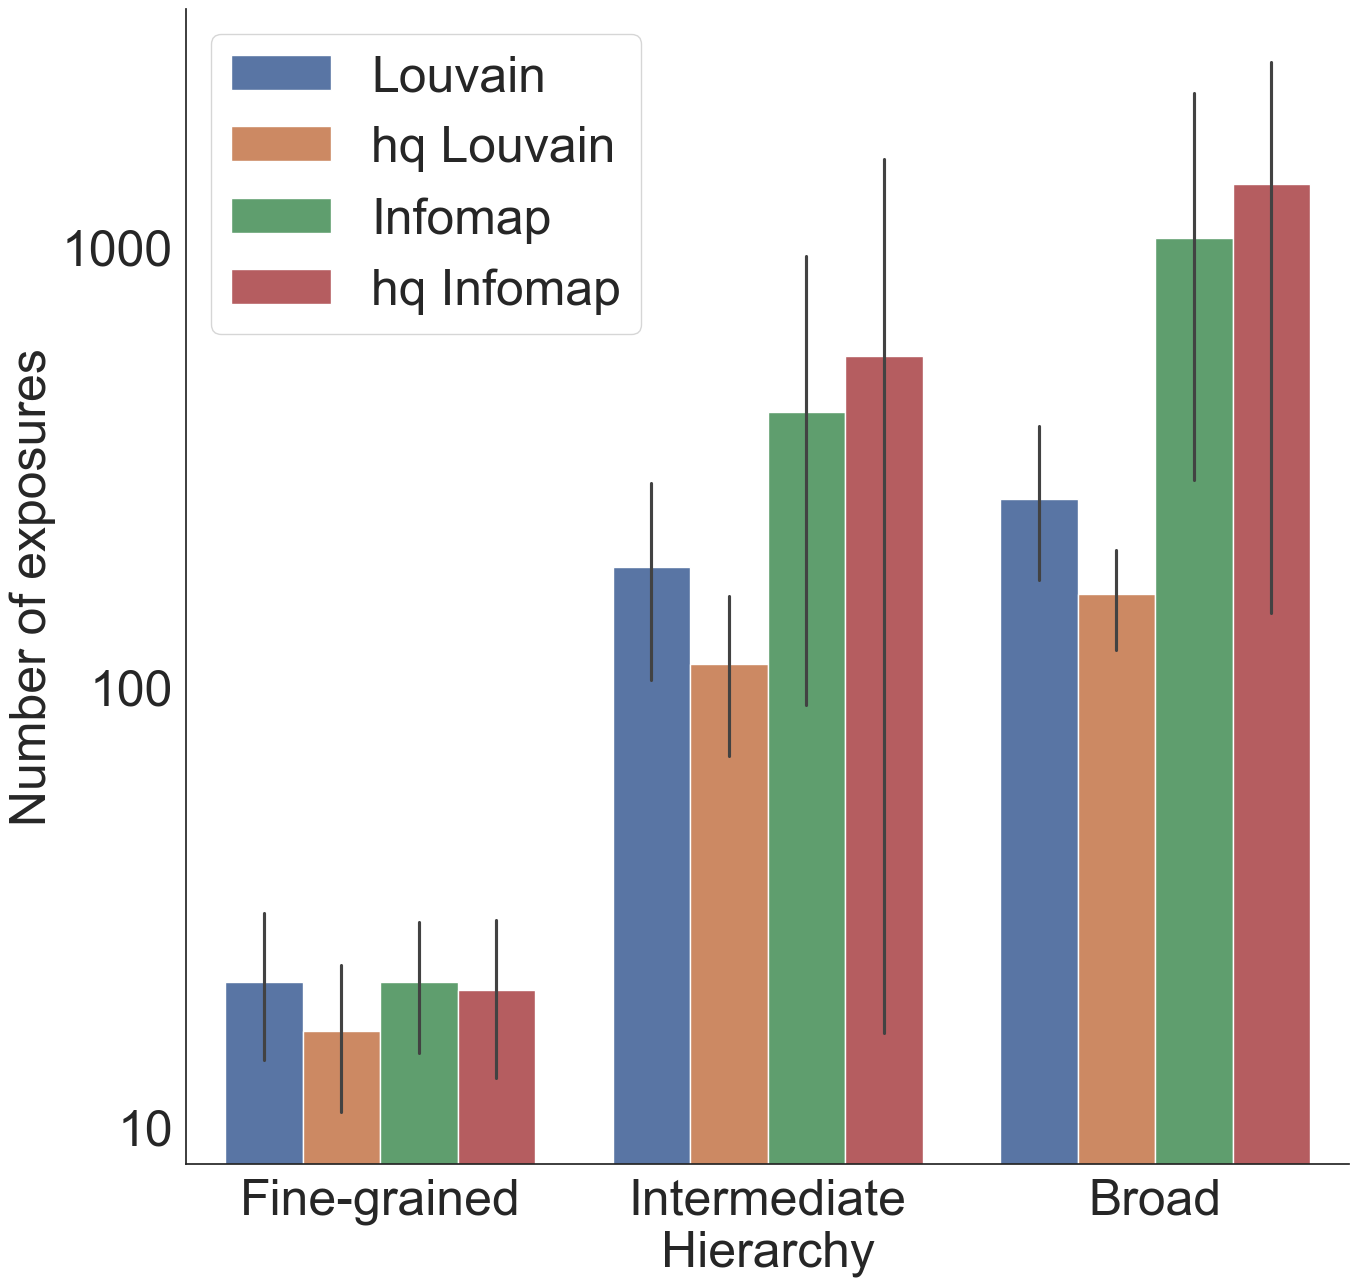

In [ ]:
import seaborn as sns

com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,expset in louvain_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in hq_louvain_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("hq Louvain")

for com,expset in infomap_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in hq_infomap_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("hq Infomap")

for com,expset in louvain_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in hq_louvain_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("hq Louvain")

for com,expset in infomap_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in hq_infomap_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("hq Infomap")

for com,expset in louvain_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in hq_louvain_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("hq Louvain")

for com,expset in infomap_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in hq_infomap_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("hq Infomap")



com_size_df['Hierarchy']=status_list
com_size_df['Number of exposures']=num_terms_list
com_size_df['Type']=level_list


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='Number of exposures', hue='Type', data=com_size_df)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('Number of exposures', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/Community_Exposures_hqComparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
#Let's compare the number of genes
import json

#Louvain
with open("output/Communities/Louvain/first_louvain_cluster_genes.json", "r") as handle:
    louvain_fine_grained_genes = json.load(handle)

with open("output/Communities/Louvain/second_louvain_cluster_genes.json", 'rb') as handle:
    louvain_middle_genes = json.load(handle)

with open("output/Communities/Louvain/third_louvain_cluster_genes.json", 'rb') as handle:
    louvain_broad_genes = json.load(handle)


#hq Louvain

with open("output/Communities/Extended/hq_first_louvain_cluster_genes.json", "r") as handle:
    hq_louvain_fine_grained_genes = json.load(handle)

with open('output/Communities/Extended/hq_second_louvain_cluster_genes.json', 'rb') as handle:
    hq_louvain_middle_genes = json.load(handle)

with open('output/Communities/Extended/hq_third_louvain_cluster_genes.json', 'rb') as handle:
    hq_louvain_broad_genes = json.load(handle)


#Infomap
with open("output/Communities/Infomap/first_infomap_cluster_genes.json", "r") as handle:
    infomap_fine_grained_genes = json.load(handle)

with open("output/Communities/Infomap/second_infomap_cluster_genes.json", "r") as handle:
    infomap_middle_genes = json.load(handle)

with open("output/Communities/Infomap/third_infomap_cluster_genes.json", "r") as handle:
    infomap_broad_genes = json.load(handle)


#hq Infomap

with open("output/Communities/Extended/hq_first_infomap_cluster_genes.json", "r") as handle:
    hq_infomap_fine_grained_genes = json.load(handle)

with open("output/Communities/Extended/hq_second_infomap_cluster_genes.json", "r") as handle:
    hq_infomap_middle_genes = json.load(handle)

with open("output/Communities/Extended/hq_third_infomap_cluster_genes.json", "r") as handle:
    hq_infomap_broad_genes = json.load(handle)


/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/1127654586.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


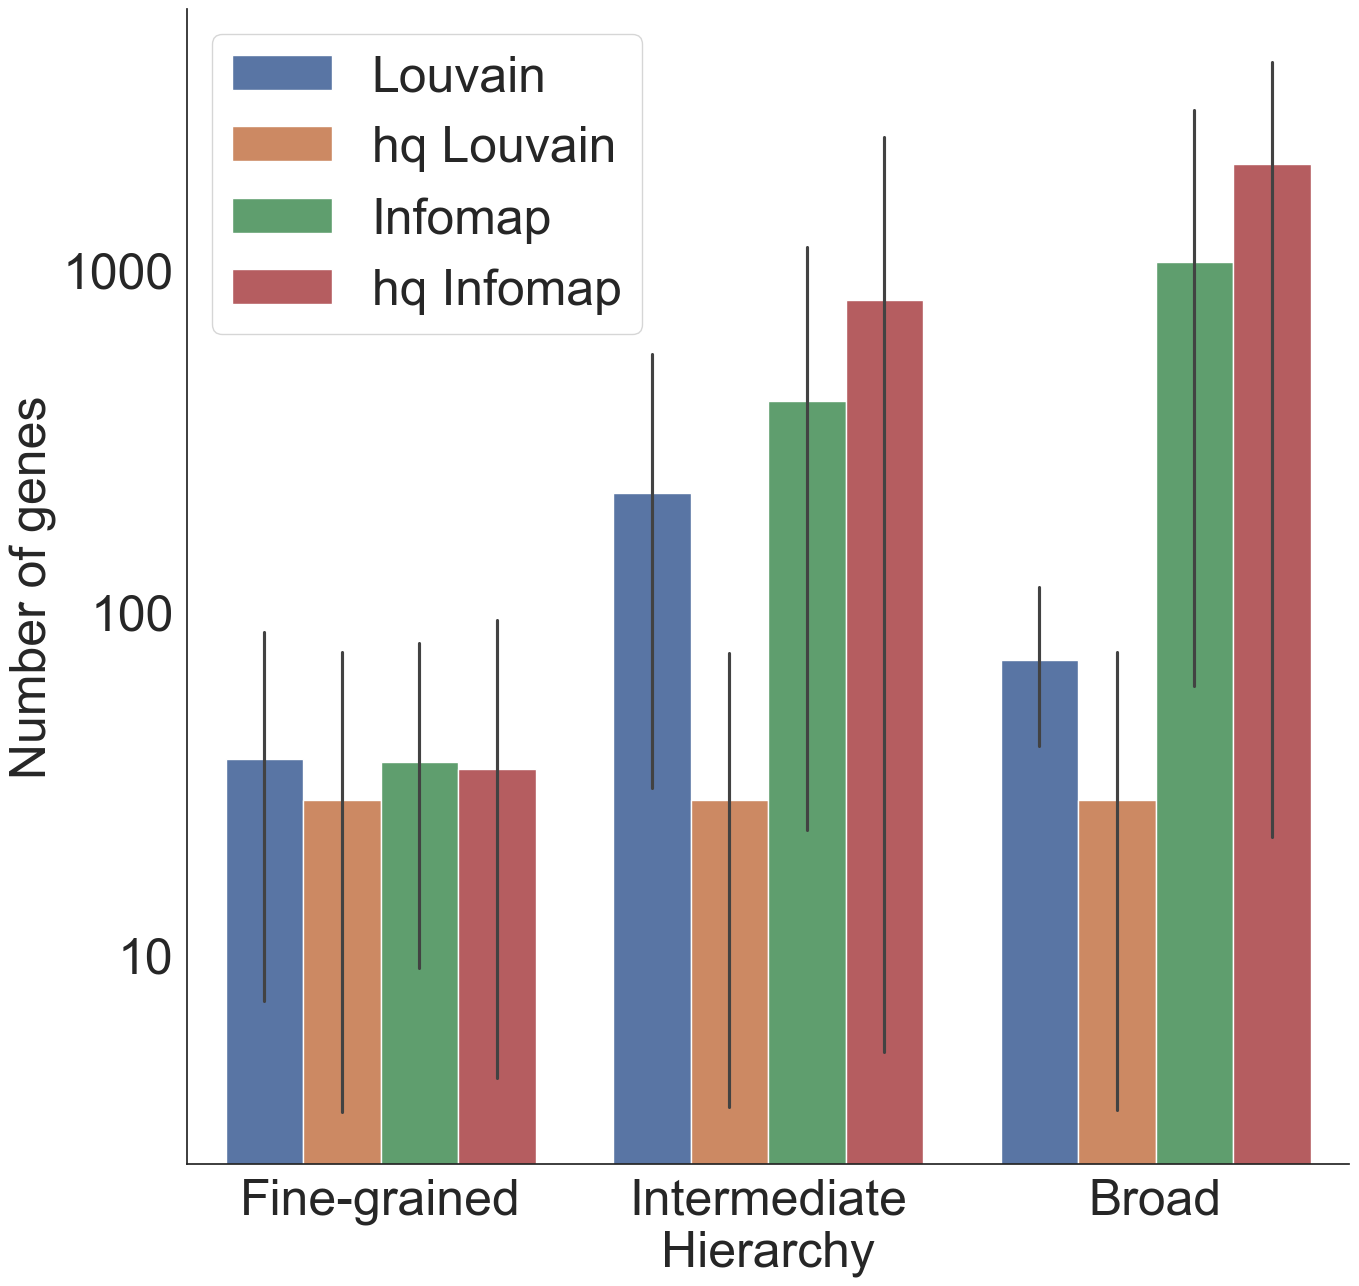

In [ ]:
com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,expset in louvain_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in hq_louvain_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("hq Louvain")

for com,expset in infomap_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in hq_infomap_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("hq Infomap")

for com,expset in louvain_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in hq_louvain_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("hq Louvain")

for com,expset in infomap_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in hq_infomap_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("hq Infomap")

for com,expset in louvain_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in hq_louvain_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("hq Louvain")

for com,expset in infomap_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in hq_infomap_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("hq Infomap")


com_size_df['Hierarchy']=status_list
com_size_df['Number of genes']=num_terms_list
com_size_df['Type']=level_list


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='Number of genes', hue='Type',estimator=np.mean, data=com_size_df)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('Number of genes', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/hqCommunitye_GeneComparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
#Let's compare the enrichment now

# hq
hq_first_louvain_ora_dict = read_json_to_dict("output/Communities/Extended/hq_first_louvain_ora_dict.json")
hq_second_louvain_ora_dict = read_json_to_dict("output/Communities/Extended/hq_second_louvain_ora_dict.json")
hq_third_louvain_ora_dict = read_json_to_dict("output/Communities/Extended/hq_third_louvain_ora_dict.json")

# Louvain

first_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/first_louvain_ora_dict.json")
second_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/second_louvain_cluster_ora_dict.json")
third_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/third_louvain_cluster_ora_dict.json")

# Infomap

first_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/first_infomap_ora_dict.json")
second_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/second_infomap_cluster_ora_dict.json")
third_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/third_infomap_cluster_ora_dict.json")

# hq Infomap
hq_first_infomap_ora_dict = read_json_to_dict("output/Communities/Extended/hq_first_infomap_ora_dict.json")
hq_second_infomap_ora_dict = read_json_to_dict("output/Communities/Extended/hq_second_infomap_ora_dict.json")
hq_third_infomap_ora_dict = read_json_to_dict("output/Communities/Extended/hq_third_infomap_ora_dict.json")


In [26]:

sig_go_first_hq_louvain_ora_dict = {}
sig_go_first_louvain_ora_dict = {}

for com,enr_df in hq_first_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_hq_louvain_ora_dict[com] = go_list

for com,enr_df in first_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_louvain_ora_dict[com] = go_list

sig_go_second_hq_louvain_ora_dict = {}
sig_go_second_louvain_ora_dict = {}

for com,enr_df in hq_second_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_hq_louvain_ora_dict[com] = go_list

for com,enr_df in second_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_louvain_ora_dict[com] = go_list

sig_go_third_hq_louvain_ora_dict = {}
sig_go_third_louvain_ora_dict = {}

for com,enr_df in hq_third_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_hq_louvain_ora_dict[com] = go_list

for com,enr_df in third_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_louvain_ora_dict[com] = go_list


sig_go_first_hq_infomap_ora_dict = {}
sig_go_first_infomap_ora_dict = {}

for com,enr_df in hq_first_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_hq_infomap_ora_dict[com] = go_list

for com,enr_df in first_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_infomap_ora_dict[com] = go_list

sig_go_second_hq_infomap_ora_dict = {}
sig_go_second_infomap_ora_dict = {}

for com,enr_df in hq_second_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_hq_infomap_ora_dict[com] = go_list

for com,enr_df in second_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_infomap_ora_dict[com] = go_list

sig_go_third_infomap_ora_dict = {}
sig_go_third_hq_infomap_ora_dict = {}


for com,enr_df in third_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_infomap_ora_dict[com] = go_list

for com,enr_df in hq_third_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_hq_infomap_ora_dict[com] = go_list

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/921765375.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/921765375.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(i) for i in ax.get_yticks()], size=24)


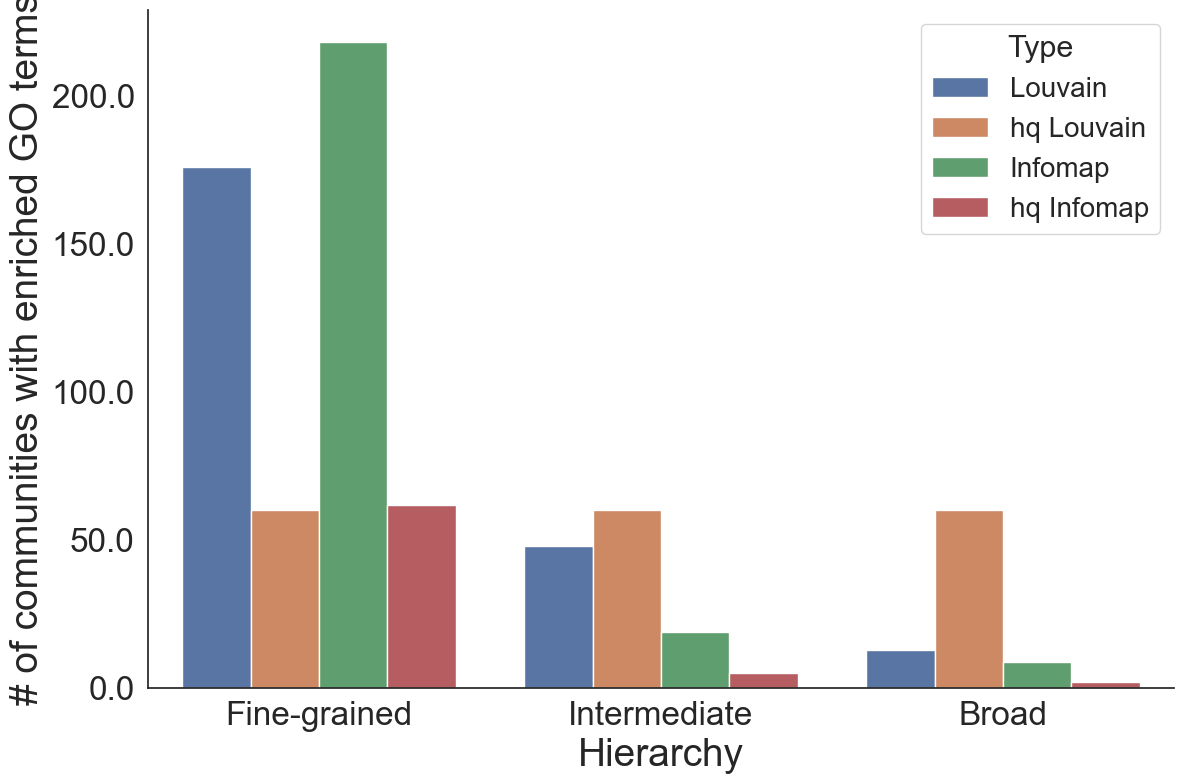

In [ ]:

data = [
    ("Louvain", "Fine-grained", len([com for com in sig_go_first_louvain_ora_dict.keys() if len(sig_go_first_louvain_ora_dict[com])!=0])),
    ("Louvain", "Intermediate", len([com for com in sig_go_second_louvain_ora_dict.keys() if len(sig_go_second_louvain_ora_dict[com])!=0])),
    ("Louvain", "Broad", len([com for com in sig_go_third_louvain_ora_dict.keys() if len(sig_go_third_louvain_ora_dict[com])!=0])),
    ("hq Louvain", "Fine-grained", len([com for com in sig_go_first_hq_louvain_ora_dict.keys() if len(sig_go_first_hq_louvain_ora_dict[com])!=0])),
    ("hq Louvain",  "Intermediate", len([com for com in sig_go_second_hq_louvain_ora_dict.keys() if len(sig_go_second_hq_louvain_ora_dict[com])!=0])),
    ("hq Louvain",  "Broad", len([com for com in sig_go_third_hq_louvain_ora_dict.keys() if len(sig_go_third_hq_louvain_ora_dict[com])!=0])),
    ("Infomap",  "Fine-grained", len([com for com in sig_go_first_infomap_ora_dict.keys() if len(sig_go_first_infomap_ora_dict[com])!=0])),
    ("Infomap", "Intermediate",len([com for com in sig_go_second_infomap_ora_dict.keys() if len(sig_go_second_infomap_ora_dict[com])!=0])),
    ("Infomap",  "Broad", len([com for com in sig_go_third_infomap_ora_dict.keys() if len(sig_go_third_infomap_ora_dict[com])!=0])),
    ("hq Infomap", "Fine-grained", len([com for com in sig_go_first_hq_infomap_ora_dict.keys() if len(sig_go_first_hq_infomap_ora_dict[com])!=0])),
    ("hq Infomap", "Intermediate", len([com for com in sig_go_second_hq_infomap_ora_dict.keys() if len(sig_go_second_hq_infomap_ora_dict[com])!=0])),
    ("hq Infomap", "Broad", len([com for com in sig_go_third_hq_infomap_ora_dict.keys() if len(sig_go_third_hq_infomap_ora_dict[com])!=0])),
]

df_plot = pd.DataFrame(data, columns=["Type", "Hierarchy", "Enriched_com"])

plt.figure(figsize=(12,8))
ax = sns.barplot(
    x="Hierarchy", 
    y="Enriched_com", 
    hue="Type", 
    data=df_plot, 
    ci=None
)

# styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


ax.set_yticklabels([str(i) for i in ax.get_yticks()], size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Hierarchy", fontsize=28)
plt.ylabel("# of communities with enriched GO terms", fontsize=28)

plt.legend(title="Type", fontsize=20, title_fontsize=22)
plt.tight_layout()
plt.savefig('output/Figures/hqCommunitye_EnrichmentComparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()

In [35]:
#Let's divide in the three GO branches


sig_enr_GOBP_hq_third_louvain_ora_dict = {}
sig_enr_GOMF_hq_third_louvain_ora_dict = {}
sig_enr_GOCC_hq_third_louvain_ora_dict = {}
for com,enr_df in hq_third_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_hq_third_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_hq_third_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_hq_third_louvain_ora_dict[com] = gocc_list

sig_enr_GOBP_hq_second_louvain_ora_dict = {}
sig_enr_GOMF_hq_second_louvain_ora_dict = {}
sig_enr_GOCC_hq_second_louvain_ora_dict = {}
for com,enr_df in hq_second_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_hq_second_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_hq_second_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_hq_second_louvain_ora_dict[com] = gocc_list

sig_enr_GOBP_hq_first_louvain_ora_dict = {}
sig_enr_GOMF_hq_first_louvain_ora_dict = {}
sig_enr_GOCC_hq_first_louvain_ora_dict = {}
for com,enr_df in hq_first_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_hq_first_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_hq_first_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_hq_first_louvain_ora_dict[com] = gocc_list


sig_enr_GOBP_hq_second_infomap_ora_dict = {}
sig_enr_GOMF_hq_second_infomap_ora_dict = {}
sig_enr_GOCC_hq_second_infomap_ora_dict = {}
for com,enr_df in hq_second_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_hq_second_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_hq_second_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_hq_second_infomap_ora_dict[com] = gocc_list

sig_enr_GOBP_hq_first_infomap_ora_dict = {}
sig_enr_GOMF_hq_first_infomap_ora_dict = {}
sig_enr_GOCC_hq_first_infomap_ora_dict = {}
for com,enr_df in hq_first_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_hq_first_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_hq_first_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_hq_first_infomap_ora_dict[com] = gocc_list


sig_enr_GOBP_hq_third_infomap_ora_dict = {}
sig_enr_GOMF_hq_third_infomap_ora_dict = {}
sig_enr_GOCC_hq_third_infomap_ora_dict = {}
for com,enr_df in hq_third_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_hq_third_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_hq_third_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_hq_third_infomap_ora_dict[com] = gocc_list


In [52]:
#Here, we will define a funnction that calculates the lcc for each set of terms in the GO tree to check for the 
#cohesiveness of the enrichment terms in each community
import random as rd
import numpy as np
import networkx as nx

def lcc_significance(term_list, network, S=1000):
    z = np.nan
    term_list = list(set(term_list))  # deduplicate once
    
    if len(term_list) > 1:
        try:
            # observed LCC size
            G_sub = network.subgraph(term_list)
            largest_cc = max(nx.connected_components(G_sub), key=len)
            f_lcc_size = len(largest_cc)
        except ValueError:  # empty subgraph
            f_lcc_size = 1

        # precompute node list for sampling
        nodes = list(network.nodes())
        n = len(term_list)

        # random samples
        lcc_sizes = np.empty(S, dtype=int)
        for i in range(S):
            term_sample = rd.sample(nodes, n)
            G_sub_rnd = network.subgraph(term_sample)
            largest_cc_rnd = max(nx.connected_components(G_sub_rnd), key=len)
            lcc_sizes[i] = len(largest_cc_rnd)

        mu = lcc_sizes.mean()
        std = lcc_sizes.std(ddof=1)  # unbiased std
        if std > 0:
            z = (f_lcc_size - mu) / std

    return z


In [ ]:
import json

def read_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

# Example usage:
json_file = 'input/Libraries/c5.go.v2023.1.Hs.json'
go_gsea_file = read_json(json_file)

go_match_id_dict = {}
for key,description_dict in go_gsea_file.items():
    up_key = key.replace("_"," ")
    go_match_id_dict[up_key]= description_dict["exactSource"]

In [ ]:
sig_enr_id_GOMF_hq_third_louvain_ora_dict = {}
sig_enr_id_GOBP_hq_third_louvain_ora_dict = {}
sig_enr_id_GOCC_hq_third_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_hq_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_hq_third_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_hq_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_hq_third_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_hq_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_hq_third_louvain_ora_dict[com] = n_term_list

sig_enr_id_GOMF_hq_second_louvain_ora_dict = {}
sig_enr_id_GOBP_hq_second_louvain_ora_dict = {}
sig_enr_id_GOCC_hq_second_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_hq_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_hq_second_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_hq_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_hq_second_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_hq_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_hq_second_louvain_ora_dict[com] = n_term_list


sig_enr_id_GOMF_hq_first_louvain_ora_dict = {}
sig_enr_id_GOBP_hq_first_louvain_ora_dict = {}
sig_enr_id_GOCC_hq_first_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_hq_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_hq_first_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_hq_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_hq_first_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_hq_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_hq_first_louvain_ora_dict[com] = n_term_list

In [43]:

sig_enr_id_GOMF_hq_second_infomap_ora_dict = {}
sig_enr_id_GOBP_hq_second_infomap_ora_dict = {}
sig_enr_id_GOCC_hq_second_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_hq_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_hq_second_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_hq_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_hq_second_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_hq_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_hq_second_infomap_ora_dict[com] = n_term_list


sig_enr_id_GOMF_hq_first_infomap_ora_dict = {}
sig_enr_id_GOBP_hq_first_infomap_ora_dict = {}
sig_enr_id_GOCC_hq_first_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_hq_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_hq_first_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_hq_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_hq_first_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_hq_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_hq_first_infomap_ora_dict[com] = n_term_list

sig_enr_id_GOMF_hq_third_infomap_ora_dict = {}
sig_enr_id_GOBP_hq_third_infomap_ora_dict = {}
sig_enr_id_GOCC_hq_third_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_hq_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_hq_third_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_hq_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_hq_third_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_hq_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_hq_third_infomap_ora_dict[com] = n_term_list


In [41]:
#Let's import the latest release of the GO ontology
import obonet

url = 'http://purl.obolibrary.org/obo/go.obo'
graph = obonet.read_obo(url)
graph_up = nx.DiGraph.reverse(graph)

In [42]:
#BP
GOBP = graph_up.subgraph(list(nx.descendants(graph_up,'GO:0008150')))
GOBP_undirected=GOBP.to_undirected()
#MF
GOMF = graph_up.subgraph(list(nx.descendants(graph_up,'GO:0003674')))
GOMF_undirected=GOMF.to_undirected()
#CC
GOCC = graph_up.subgraph(list(nx.descendants(graph_up,'GO:0005575')))
GOCC_undirected=GOCC.to_undirected()


In [44]:

sig_enr_GOBP_hq_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_hq_first_louvain_ora_dict.items():
    sig_enr_GOBP_hq_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_hq_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_hq_first_louvain_ora_dict.items():
    sig_enr_GOMF_hq_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_hq_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_hq_first_louvain_ora_dict.items():
    sig_enr_GOCC_hq_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_hq_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_hq_second_louvain_ora_dict.items():
    sig_enr_GOBP_hq_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_hq_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_hq_second_louvain_ora_dict.items():
    sig_enr_GOMF_hq_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_hq_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_hq_second_louvain_ora_dict.items():
    sig_enr_GOCC_hq_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_hq_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_hq_third_louvain_ora_dict.items():
    sig_enr_GOBP_hq_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_hq_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_hq_third_louvain_ora_dict.items():
    sig_enr_GOMF_hq_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_hq_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_hq_third_louvain_ora_dict.items():
    sig_enr_GOCC_hq_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)


sig_enr_GOBP_hq_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_hq_first_infomap_ora_dict.items():
    sig_enr_GOBP_hq_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_hq_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_hq_first_infomap_ora_dict.items():
    sig_enr_GOMF_hq_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_hq_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_hq_first_infomap_ora_dict.items():
    sig_enr_GOCC_hq_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_hq_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_hq_second_infomap_ora_dict.items():
    sig_enr_GOBP_hq_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_hq_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_hq_second_infomap_ora_dict.items():
    sig_enr_GOMF_hq_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_hq_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_hq_second_infomap_ora_dict.items():
    sig_enr_GOCC_hq_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)




sig_enr_GOBP_hq_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_hq_third_infomap_ora_dict.items():
    sig_enr_GOBP_hq_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_hq_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_hq_third_infomap_ora_dict.items():
    sig_enr_GOMF_hq_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_hq_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_hq_third_infomap_ora_dict.items():
    sig_enr_GOCC_hq_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/4284327716.py:27: RuntimeWarning: invalid value encountered in scalar divide
  z = (f_lcc_size-mu)/std
/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/4284327716.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  z = (f_lcc_size-mu)/std


In [ ]:
import os
import pickle

# Ensure output folder exists
os.makedirs("Enrichment/output", exist_ok=True)

# Collect all dictionaries in a single mapping
dicts_to_save = {
    "sig_enr_GOBP_hq_first_louvain_ora_lcc_zscore": sig_enr_GOBP_hq_first_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOMF_hq_first_louvain_ora_lcc_zscore": sig_enr_GOMF_hq_first_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOCC_hq_first_louvain_ora_lcc_zscore": sig_enr_GOCC_hq_first_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOBP_hq_second_louvain_ora_lcc_zscore": sig_enr_GOBP_hq_second_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOMF_hq_second_louvain_ora_lcc_zscore": sig_enr_GOMF_hq_second_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOCC_hq_second_louvain_ora_lcc_zscore": sig_enr_GOCC_hq_second_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOBP_hq_third_louvain_ora_lcc_zscore": sig_enr_GOBP_hq_third_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOMF_hq_third_louvain_ora_lcc_zscore": sig_enr_GOMF_hq_third_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOCC_hq_third_louvain_ora_lcc_zscore": sig_enr_GOCC_hq_third_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOBP_hq_first_infomap_ora_lcc_zscore": sig_enr_GOBP_hq_first_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOMF_hq_first_infomap_ora_lcc_zscore": sig_enr_GOMF_hq_first_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOCC_hq_first_infomap_ora_lcc_zscore": sig_enr_GOCC_hq_first_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOBP_hq_second_infomap_ora_lcc_zscore": sig_enr_GOBP_hq_second_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOMF_hq_second_infomap_ora_lcc_zscore": sig_enr_GOMF_hq_second_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOCC_hq_second_infomap_ora_lcc_zscore": sig_enr_GOCC_hq_second_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOBP_hq_third_infomap_ora_lcc_zscore": sig_enr_GOBP_hq_third_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOMF_hq_third_infomap_ora_lcc_zscore": sig_enr_GOMF_hq_third_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOCC_hq_third_infomap_ora_lcc_zscore": sig_enr_GOCC_hq_third_infomap_ora_lcc_zscore_dict,
}

# Save each dictionary as pickle
for name, d in dicts_to_save.items():
    with open(f"output/Communities/Extended/{name}.pkl", "wb") as f:
        pickle.dump(d, f)



In [45]:
#Let's import the other lcc z-score

with open('output/Communities/Louvain/sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict = pk.load(handle)       

with open('output/Communities/Louvain/sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict = pk.load(handle)   

with open('output/Communities/Louvain/sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict = pk.load(handle)   



with open('output/Communities/Infomap/sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict = pk.load(handle)       

with open('output/Communities/Infomap/sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict = pk.load(handle)   

with open('output/Communities/Infomap/sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict = pk.load(handle)   

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/3287550494.py:239: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  com_size_df = com_size_df.replace('nan', -2)
/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/3287550494.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


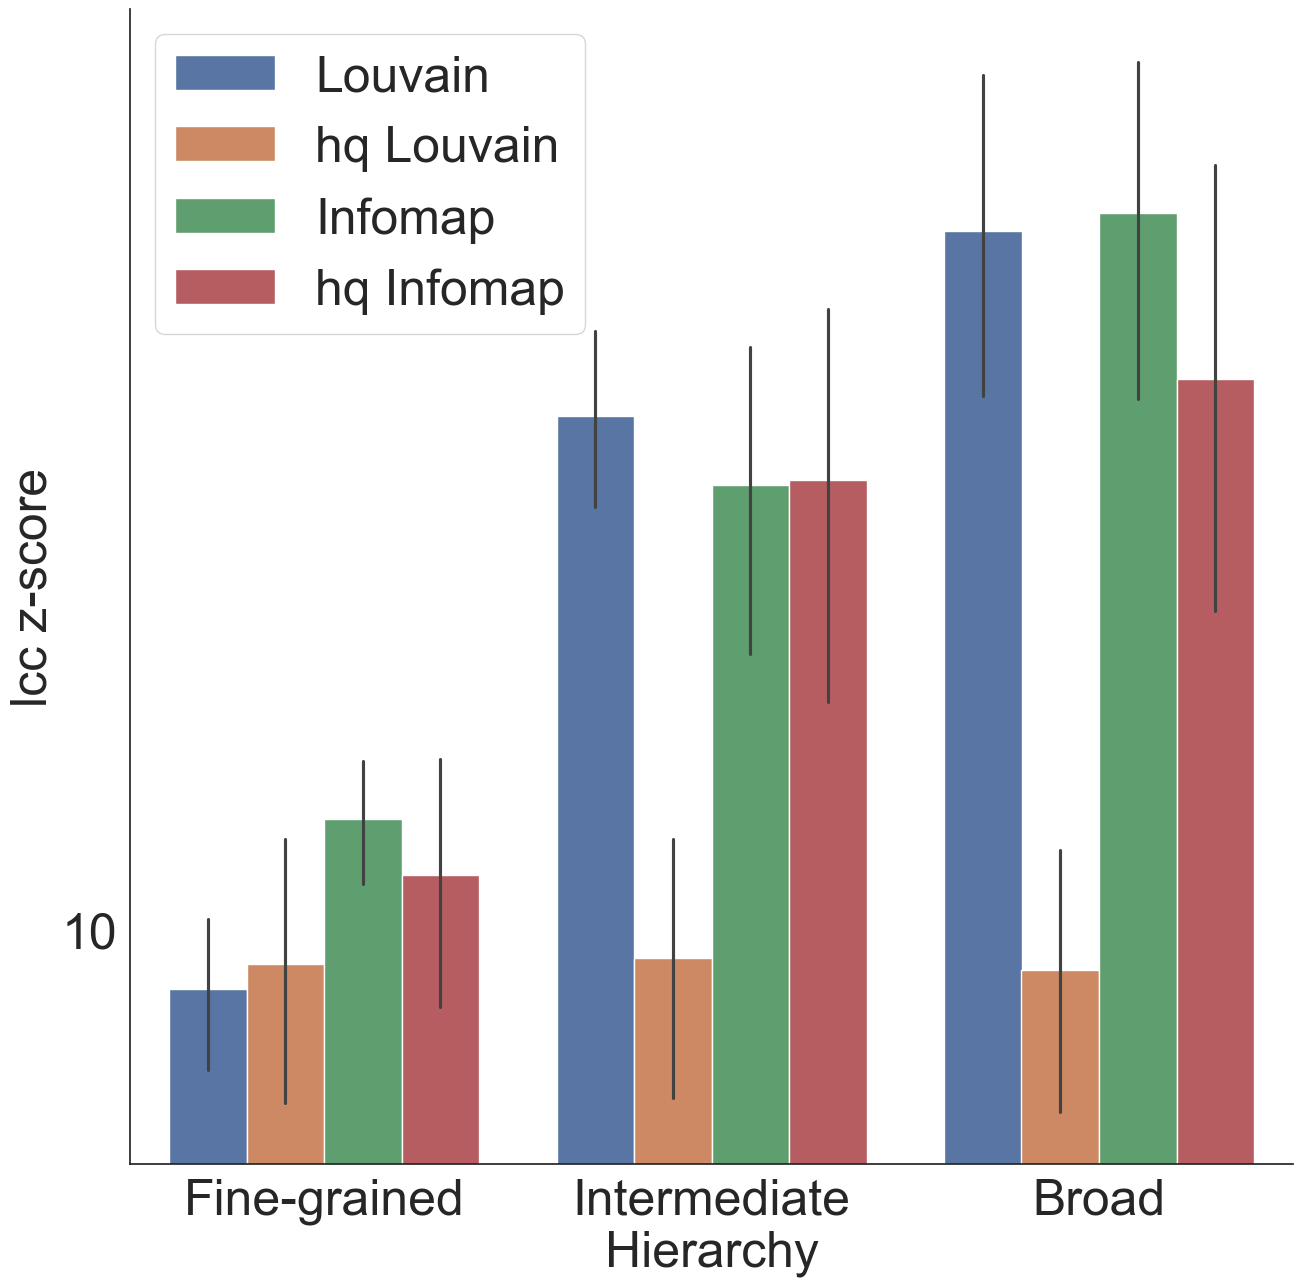

In [ ]:


com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]
community = []

for com,z in sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_hq_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_hq_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_hq_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_hq_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)


for com,z in sig_enr_GOMF_hq_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_hq_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)





for com,z in sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_hq_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_hq_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_hq_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_hq_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)


for com,z in sig_enr_GOMF_hq_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_hq_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_hq_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)


for com,z in sig_enr_GOMF_hq_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_hq_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("hq Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_hq_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_hq_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_hq_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("hq Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)



com_size_df['Hierarchy']=status_list
com_size_df['lcc z-score']=num_terms_list
com_size_df['Type']=level_list
com_size_df['Community Name']=community


com_size_df = com_size_df.replace('nan', -2)
com_size_df = com_size_df.dropna(subset=['lcc z-score'])  # Drop rows with NaN in 'lcc z-score'


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='lcc z-score', hue='Type',estimator=np.mean, data=com_size_df)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('lcc z-score', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/hqBipartite_CommunityEnrichment_lcc_comparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()

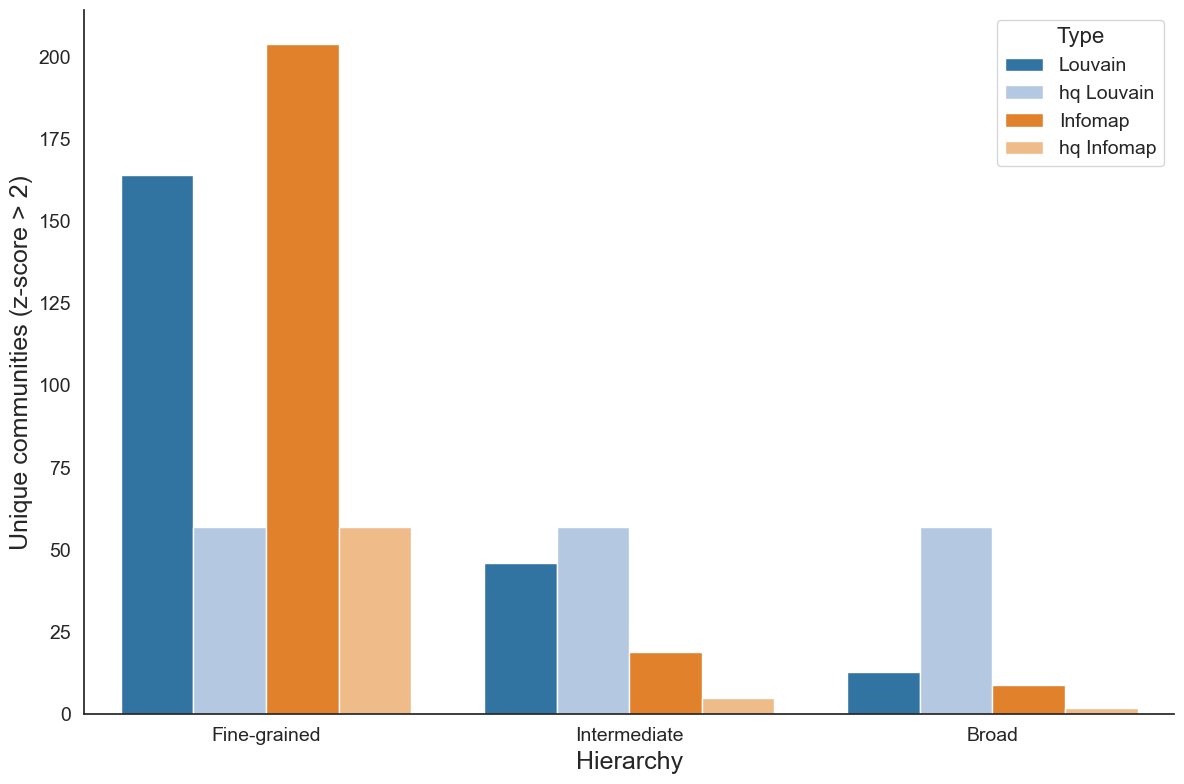

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter only communities with lcc z-score > 2
filtered_df = com_size_df[com_size_df['lcc z-score'] > 2]

# Count unique communities grouped by Hierarchy and Type
plot_df = (
    filtered_df.groupby(['Hierarchy', 'Type'])['Community Name']
    .nunique()
    .reset_index(name='Num_communities')
)

# Set hierarchy order
hierarchy_order = ['Fine-grained', 'Intermediate', 'Broad']
plot_df['Hierarchy'] = pd.Categorical(
    plot_df['Hierarchy'], categories=hierarchy_order, ordered=True
)

# Set type order
type_order = ["Louvain", "hq Louvain", "Infomap", "hq Infomap"]
plot_df['Type'] = pd.Categorical(
    plot_df['Type'], categories=type_order, ordered=True
)

# Define palette for the four categories
palette = {
    "Louvain": "#1f77b4",        # blue
    "hq Louvain": "#aec7e8", # light blue
    "Infomap": "#ff7f0e",        # orange
    "hq Infomap": "#ffbb78"  # light orange
}

# Plot
plt.figure(figsize=(12,8))
ax = sns.barplot(
    x='Hierarchy',
    y='Num_communities',
    hue='Type',
    data=plot_df,
    order=hierarchy_order,
    hue_order=type_order,
    palette=palette
)

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.xlabel("Hierarchy", fontsize=18)
plt.ylabel("Unique communities (z-score > 2)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Type", fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.savefig('Figures/hqBipartite_CommunityEnrichment_lcc_comparison_v2.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#Homo-Mouse

In [ ]:
#Louvain
with open('output/Communities/Louvain/weighted_ji_fine_grained_communities_dict.pickle', 'rb') as handle:
    louvain_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Louvain/weighted_ji_middle_communities_dict.pickle', 'rb') as handle:
    louvain_middle_exposures = pk.load(handle)

with open('output/Communities/Louvain/weighted_ji_broad_communities_dict.pickle', 'rb') as handle:
    louvain_broad_exposures = pk.load(handle)


#homomouse Louvain

with open('output/Communities/Extended/homomouse_weighted_ji_fine_grained_communities_dict.pickle', 'rb') as handle:
    homomouse_louvain_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Extended/homomouse_weighted_ji_middle_communities_dict.pickle', 'rb') as handle:
    homomouse_louvain_middle_exposures = pk.load(handle)

with open('output/Communities/Extended/homomouse_weighted_ji_broad_communities_dict.pickle', 'rb') as handle:
    homomouse_louvain_broad_exposures = pk.load(handle)



#Infomap
with open('output/Communities/Infomap/ji_infomap_fine_grained_communities_dict.pickle', 'rb') as handle:
    infomap_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Infomap/ji_infomap_middle_communities_dict.pickle', 'rb') as handle:
    infomap_middle_exposures = pk.load(handle)

with open('output/Communities/Infomap/ji_infomap_broad_communities_dict.pickle', 'rb') as handle:
    infomap_broad_exposures = pk.load(handle)


#homomouse Infomap

with open('output/Communities/Extended/homomousebipartite_infomap_fine_grained_communities_dict.pickle', 'rb') as handle:
    homomouse_infomap_fine_grained_exposures = pk.load(handle)

with open('output/Communities/Extended/homomousebipartite_infomap_middle_communities_dict.pickle', 'rb') as handle:
    homomouse_infomap_middle_exposures = pk.load(handle)

with open('output/Communities/Extended/homomousebiprtite_infomap_broad_communities_dict.pickle', 'rb') as handle:
    homomouse_infomap_broad_exposures = pk.load(handle)

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/1828153815.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


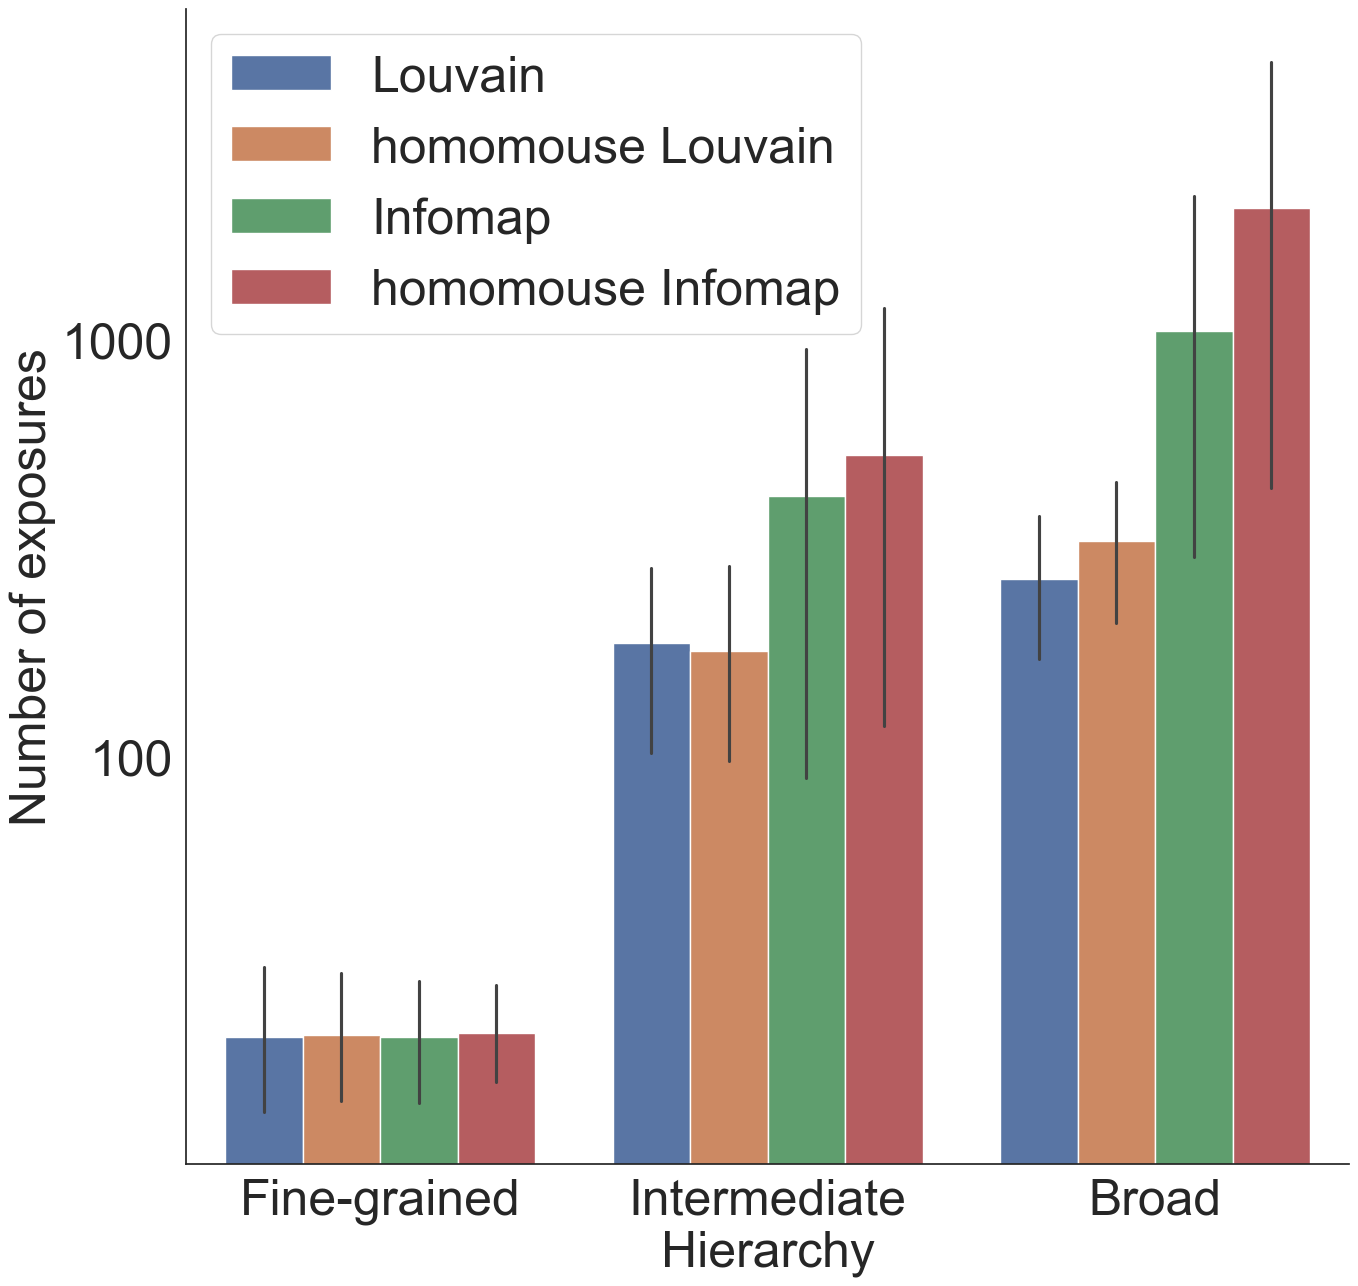

In [ ]:
import seaborn as sns

com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,expset in louvain_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in homomouse_louvain_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Louvain")

for com,expset in infomap_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in homomouse_infomap_fine_grained_exposures.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Infomap")

for com,expset in louvain_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in homomouse_louvain_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Louvain")

for com,expset in infomap_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in homomouse_infomap_middle_exposures.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Infomap")

for com,expset in louvain_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in homomouse_louvain_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Louvain")

for com,expset in infomap_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in homomouse_infomap_broad_exposures.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Infomap")



com_size_df['Hierarchy']=status_list
com_size_df['Number of exposures']=num_terms_list
com_size_df['Type']=level_list


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='Number of exposures', hue='Type', data=com_size_df)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('Number of exposures', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/Community_Exposures_homomouseComparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#Let's compare the number of genes
import json

#Louvain
with open("output/Communities/Louvain/first_louvain_cluster_genes.json", "r") as handle:
    louvain_fine_grained_genes = json.load(handle)

with open("output/Communities/Louvain/second_louvain_cluster_genes.json", 'rb') as handle:
    louvain_middle_genes = json.load(handle)

with open("output/Communities/Louvain/third_louvain_cluster_genes.json", 'rb') as handle:
    louvain_broad_genes = json.load(handle)


#homomouse Louvain

with open("output/Communities/Extended/homomouse_first_louvain_cluster_genes.json", "r") as handle:
    homomouse_louvain_fine_grained_genes = json.load(handle)

with open('output/Communities/Extended/homomouse_second_louvain_cluster_genes.json', 'rb') as handle:
    homomouse_louvain_middle_genes = json.load(handle)

with open('output/Communities/Extended/homomouse_third_louvain_cluster_genes.json', 'rb') as handle:
    homomouse_louvain_broad_genes = json.load(handle)


#Infomap
with open("output/Communities/Infomap/first_infomap_cluster_genes.json", "r") as handle:
    infomap_fine_grained_genes = json.load(handle)

with open("output/Communities/Infomap/second_infomap_cluster_genes.json", "r") as handle:
    infomap_middle_genes = json.load(handle)

with open("output/Communities/Infomap/third_infomap_cluster_genes.json", "r") as handle:
    infomap_broad_genes = json.load(handle)


#homomouse Infomap

with open("output/Communities/Extended/homomouse_first_infomap_cluster_genes.json", "r") as handle:
    homomouse_infomap_fine_grained_genes = json.load(handle)

with open("output/Communities/Extended/homomouse_second_infomap_cluster_genes.json", "r") as handle:
    homomouse_infomap_middle_genes = json.load(handle)

with open("output/Communities/Extended/homomouse_third_infomap_cluster_genes.json", "r") as handle:
    homomouse_infomap_broad_genes = json.load(handle)

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/717324089.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


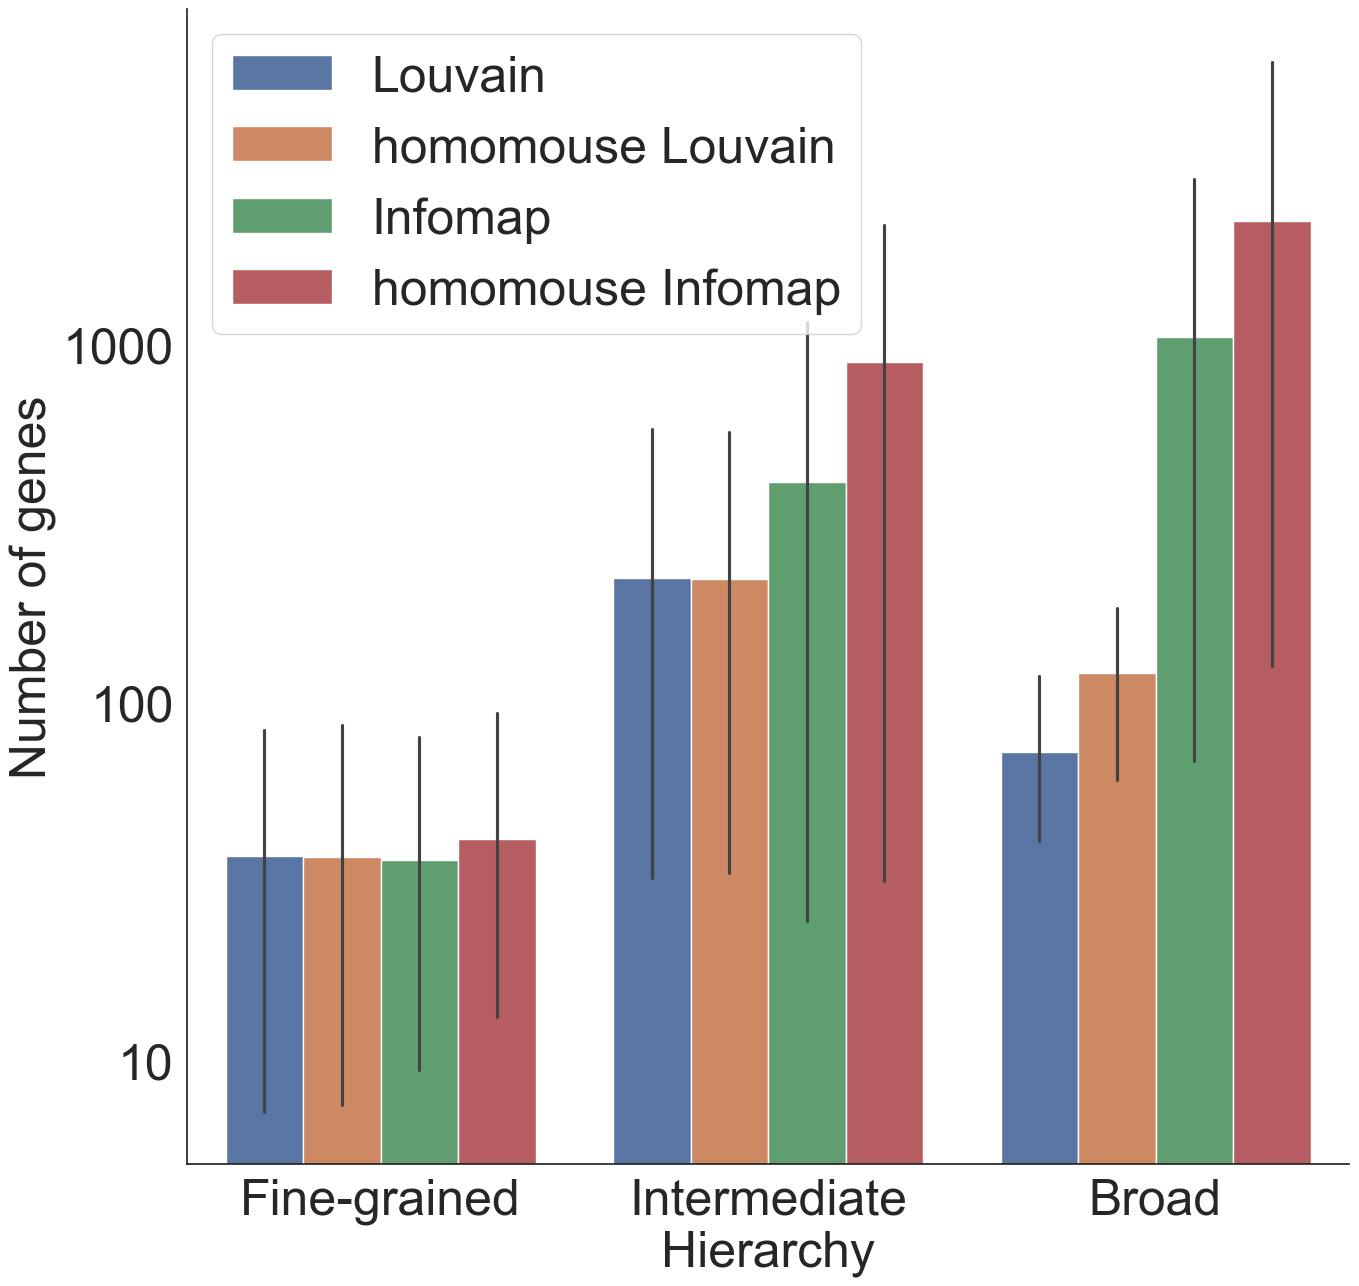

In [ ]:
com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]

for com,expset in louvain_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in homomouse_louvain_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Louvain")

for com,expset in infomap_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in homomouse_infomap_fine_grained_genes.items():
    status_list.append("Fine-grained")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Infomap")

for com,expset in louvain_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in homomouse_louvain_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Louvain")

for com,expset in infomap_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in homomouse_infomap_middle_genes.items():
    status_list.append("Intermediate")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Infomap")

for com,expset in louvain_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Louvain")

for com,expset in homomouse_louvain_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Louvain")

for com,expset in infomap_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("Infomap")

for com,expset in homomouse_infomap_broad_genes.items():
    status_list.append("Broad")
    num_terms_list.append(len(expset))
    level_list.append("homomouse Infomap")


com_size_df['Hierarchy']=status_list
com_size_df['Number of genes']=num_terms_list
com_size_df['Type']=level_list


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='Number of genes', hue='Type',estimator=np.mean, data=com_size_df)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('Number of genes', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/homomouseCommunitye_GeneComparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
#Let's compare the enrichment now

# homomouse
homomouse_first_louvain_ora_dict = read_json_to_dict("output/Communities/Extended/homomouse_first_louvain_ora_dict.json")
homomouse_second_louvain_ora_dict = read_json_to_dict("output/Communities/Extended/homomouse_second_louvain_ora_dict.json")
homomouse_third_louvain_ora_dict = read_json_to_dict("output/Communities/Extended/homomouse_third_louvain_ora_dict.json")

# Louvain

first_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/first_louvain_ora_dict.json")
second_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/second_louvain_cluster_ora_dict.json")
third_louvain_ora_dict = read_json_to_dict("output/Communities/Louvain/third_louvain_cluster_ora_dict.json")

# Infomap

first_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/first_infomap_ora_dict.json")
second_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/second_infomap_cluster_ora_dict.json")
third_infomap_ora_dict = read_json_to_dict("output/Communities/Infomap/third_infomap_cluster_ora_dict.json")

# homomouse Infomap
homomouse_first_infomap_ora_dict = read_json_to_dict("output/Communities/Extended/homomouse_first_infomap_ora_dict.json")
homomouse_second_infomap_ora_dict = read_json_to_dict("output/Communities/Extended/homomouse_second_infomap_ora_dict.json")
homomouse_third_infomap_ora_dict = read_json_to_dict("output/Communities/Extended/homomouse_third_infomap_ora_dict.json")

In [33]:

sig_go_first_homomouse_louvain_ora_dict = {}
sig_go_first_louvain_ora_dict = {}

for com,enr_df in homomouse_first_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_homomouse_louvain_ora_dict[com] = go_list

for com,enr_df in first_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_louvain_ora_dict[com] = go_list

sig_go_second_homomouse_louvain_ora_dict = {}
sig_go_second_louvain_ora_dict = {}

for com,enr_df in homomouse_second_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_homomouse_louvain_ora_dict[com] = go_list

for com,enr_df in second_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_louvain_ora_dict[com] = go_list

sig_go_third_homomouse_louvain_ora_dict = {}
sig_go_third_louvain_ora_dict = {}

for com,enr_df in homomouse_third_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_homomouse_louvain_ora_dict[com] = go_list

for com,enr_df in third_louvain_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_louvain_ora_dict[com] = go_list


sig_go_first_homomouse_infomap_ora_dict = {}
sig_go_first_infomap_ora_dict = {}

for com,enr_df in homomouse_first_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_homomouse_infomap_ora_dict[com] = go_list

for com,enr_df in first_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_first_infomap_ora_dict[com] = go_list

sig_go_second_homomouse_infomap_ora_dict = {}
sig_go_second_infomap_ora_dict = {}

for com,enr_df in homomouse_second_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_homomouse_infomap_ora_dict[com] = go_list

for com,enr_df in second_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_second_infomap_ora_dict[com] = go_list

sig_go_third_infomap_ora_dict = {}
sig_go_third_homomouse_infomap_ora_dict = {}


for com,enr_df in third_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_infomap_ora_dict[com] = go_list

for com,enr_df in homomouse_third_infomap_ora_dict.items():
    go_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            go_list.append(term)
    sig_go_third_homomouse_infomap_ora_dict[com] = go_list

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/2505489180.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/2505489180.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(i) for i in ax.get_yticks()], size=24)


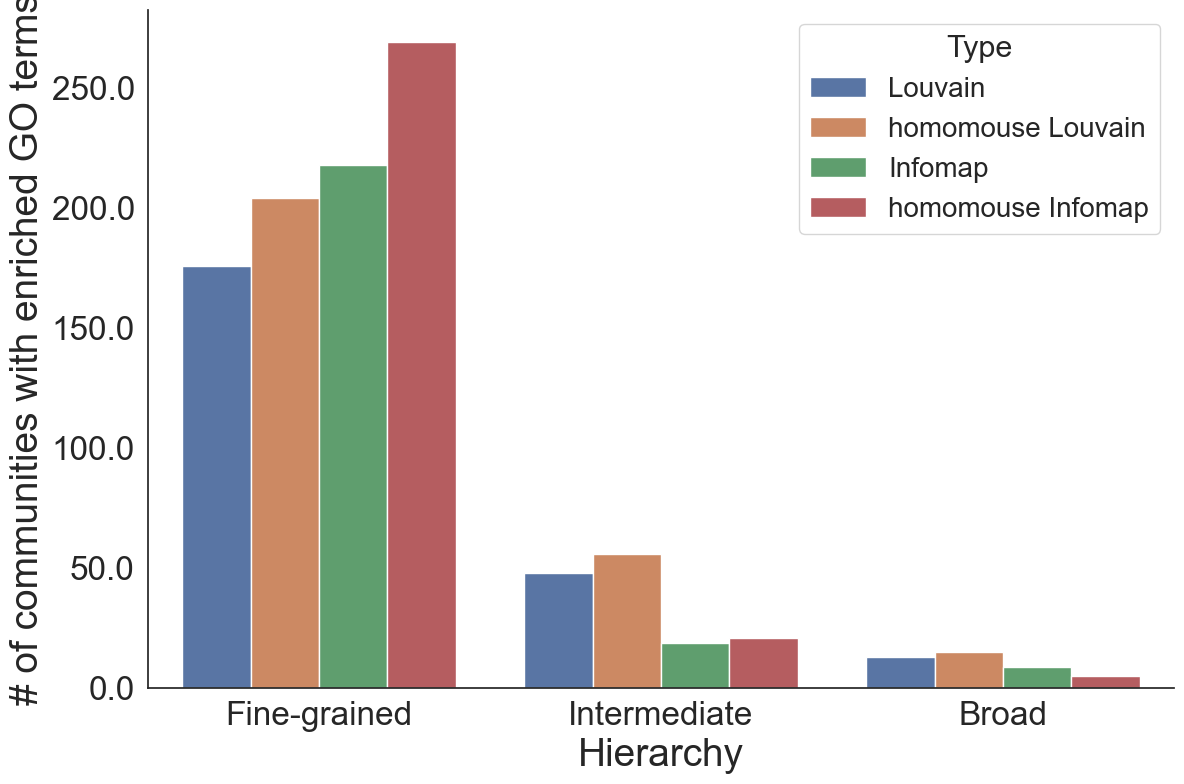

In [ ]:

data = [
    ("Louvain", "Fine-grained", len([com for com in sig_go_first_louvain_ora_dict.keys() if len(sig_go_first_louvain_ora_dict[com])!=0])),
    ("Louvain", "Intermediate", len([com for com in sig_go_second_louvain_ora_dict.keys() if len(sig_go_second_louvain_ora_dict[com])!=0])),
    ("Louvain", "Broad", len([com for com in sig_go_third_louvain_ora_dict.keys() if len(sig_go_third_louvain_ora_dict[com])!=0])),
    ("homomouse Louvain", "Fine-grained", len([com for com in sig_go_first_homomouse_louvain_ora_dict.keys() if len(sig_go_first_homomouse_louvain_ora_dict[com])!=0])),
    ("homomouse Louvain",  "Intermediate", len([com for com in sig_go_second_homomouse_louvain_ora_dict.keys() if len(sig_go_second_homomouse_louvain_ora_dict[com])!=0])),
    ("homomouse Louvain",  "Broad", len([com for com in sig_go_third_homomouse_louvain_ora_dict.keys() if len(sig_go_third_homomouse_louvain_ora_dict[com])!=0])),
    ("Infomap",  "Fine-grained", len([com for com in sig_go_first_infomap_ora_dict.keys() if len(sig_go_first_infomap_ora_dict[com])!=0])),
    ("Infomap", "Intermediate",len([com for com in sig_go_second_infomap_ora_dict.keys() if len(sig_go_second_infomap_ora_dict[com])!=0])),
    ("Infomap",  "Broad", len([com for com in sig_go_third_infomap_ora_dict.keys() if len(sig_go_third_infomap_ora_dict[com])!=0])),
    ("homomouse Infomap", "Fine-grained", len([com for com in sig_go_first_homomouse_infomap_ora_dict.keys() if len(sig_go_first_homomouse_infomap_ora_dict[com])!=0])),
    ("homomouse Infomap", "Intermediate", len([com for com in sig_go_second_homomouse_infomap_ora_dict.keys() if len(sig_go_second_homomouse_infomap_ora_dict[com])!=0])),
    ("homomouse Infomap", "Broad", len([com for com in sig_go_third_homomouse_infomap_ora_dict.keys() if len(sig_go_third_homomouse_infomap_ora_dict[com])!=0])),
]

df_plot = pd.DataFrame(data, columns=["Type", "Hierarchy", "Enriched_com"])

plt.figure(figsize=(12,8))
ax = sns.barplot(
    x="Hierarchy", 
    y="Enriched_com", 
    hue="Type", 
    data=df_plot, 
    ci=None
)

# styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


ax.set_yticklabels([str(i) for i in ax.get_yticks()], size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Hierarchy", fontsize=28)
plt.ylabel("# of communities with enriched GO terms", fontsize=28)

plt.legend(title="Type", fontsize=20, title_fontsize=22)
plt.tight_layout()
plt.savefig('output/Figures/homomouseCommunitye_EnrichmentComparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()

In [51]:

#Let's divide in the three GO branches


sig_enr_GOBP_homomouse_third_louvain_ora_dict = {}
sig_enr_GOMF_homomouse_third_louvain_ora_dict = {}
sig_enr_GOCC_homomouse_third_louvain_ora_dict = {}
for com,enr_df in homomouse_third_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_homomouse_third_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_homomouse_third_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_homomouse_third_louvain_ora_dict[com] = gocc_list

sig_enr_GOBP_homomouse_second_louvain_ora_dict = {}
sig_enr_GOMF_homomouse_second_louvain_ora_dict = {}
sig_enr_GOCC_homomouse_second_louvain_ora_dict = {}
for com,enr_df in homomouse_second_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_homomouse_second_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_homomouse_second_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_homomouse_second_louvain_ora_dict[com] = gocc_list

sig_enr_GOBP_homomouse_first_louvain_ora_dict = {}
sig_enr_GOMF_homomouse_first_louvain_ora_dict = {}
sig_enr_GOCC_homomouse_first_louvain_ora_dict = {}
for com,enr_df in homomouse_first_louvain_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_homomouse_first_louvain_ora_dict[com] = gobp_list
    sig_enr_GOMF_homomouse_first_louvain_ora_dict[com] = gomf_list
    sig_enr_GOCC_homomouse_first_louvain_ora_dict[com] = gocc_list


sig_enr_GOBP_homomouse_second_infomap_ora_dict = {}
sig_enr_GOMF_homomouse_second_infomap_ora_dict = {}
sig_enr_GOCC_homomouse_second_infomap_ora_dict = {}
for com,enr_df in homomouse_second_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_homomouse_second_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_homomouse_second_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_homomouse_second_infomap_ora_dict[com] = gocc_list

sig_enr_GOBP_homomouse_first_infomap_ora_dict = {}
sig_enr_GOMF_homomouse_first_infomap_ora_dict = {}
sig_enr_GOCC_homomouse_first_infomap_ora_dict = {}
for com,enr_df in homomouse_first_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_homomouse_first_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_homomouse_first_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_homomouse_first_infomap_ora_dict[com] = gocc_list


sig_enr_GOBP_homomouse_third_infomap_ora_dict = {}
sig_enr_GOMF_homomouse_third_infomap_ora_dict = {}
sig_enr_GOCC_homomouse_third_infomap_ora_dict = {}
for com,enr_df in homomouse_third_infomap_ora_dict.items():
    gobp_list = []
    gomf_list = []
    gocc_list = []
    for i,v in enr_df.iterrows():
        if v["FDR"] < 0.05:
            term = v["Description"]
            if "GOBP" in term:
                gobp_list.append(term)
            elif "GOMF" in term:
                gomf_list.append(term)
            elif "GOCC" in term:
                gocc_list.append(term)
    sig_enr_GOBP_homomouse_third_infomap_ora_dict[com] = gobp_list
    sig_enr_GOMF_homomouse_third_infomap_ora_dict[com] = gomf_list
    sig_enr_GOCC_homomouse_third_infomap_ora_dict[com] = gocc_list

In [53]:
sig_enr_id_GOMF_homomouse_third_louvain_ora_dict = {}
sig_enr_id_GOBP_homomouse_third_louvain_ora_dict = {}
sig_enr_id_GOCC_homomouse_third_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_homomouse_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_homomouse_third_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_homomouse_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_homomouse_third_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_homomouse_third_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_homomouse_third_louvain_ora_dict[com] = n_term_list

sig_enr_id_GOMF_homomouse_second_louvain_ora_dict = {}
sig_enr_id_GOBP_homomouse_second_louvain_ora_dict = {}
sig_enr_id_GOCC_homomouse_second_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_homomouse_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_homomouse_second_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_homomouse_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_homomouse_second_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_homomouse_second_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_homomouse_second_louvain_ora_dict[com] = n_term_list


sig_enr_id_GOMF_homomouse_first_louvain_ora_dict = {}
sig_enr_id_GOBP_homomouse_first_louvain_ora_dict = {}
sig_enr_id_GOCC_homomouse_first_louvain_ora_dict = {}

for com,enr_list in sig_enr_GOBP_homomouse_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_homomouse_first_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_homomouse_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_homomouse_first_louvain_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_homomouse_first_louvain_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_homomouse_first_louvain_ora_dict[com] = n_term_list

In [54]:


sig_enr_id_GOMF_homomouse_second_infomap_ora_dict = {}
sig_enr_id_GOBP_homomouse_second_infomap_ora_dict = {}
sig_enr_id_GOCC_homomouse_second_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_homomouse_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_homomouse_second_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_homomouse_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_homomouse_second_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_homomouse_second_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_homomouse_second_infomap_ora_dict[com] = n_term_list


sig_enr_id_GOMF_homomouse_first_infomap_ora_dict = {}
sig_enr_id_GOBP_homomouse_first_infomap_ora_dict = {}
sig_enr_id_GOCC_homomouse_first_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_homomouse_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_homomouse_first_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_homomouse_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_homomouse_first_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_homomouse_first_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_homomouse_first_infomap_ora_dict[com] = n_term_list

sig_enr_id_GOMF_homomouse_third_infomap_ora_dict = {}
sig_enr_id_GOBP_homomouse_third_infomap_ora_dict = {}
sig_enr_id_GOCC_homomouse_third_infomap_ora_dict = {}

for com,enr_list in sig_enr_GOBP_homomouse_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOBP_homomouse_third_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOMF_homomouse_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOMF_homomouse_third_infomap_ora_dict[com] = n_term_list

for com,enr_list in sig_enr_GOCC_homomouse_third_infomap_ora_dict.items():
    n_term_list = []
    for t in enr_list:
        if t in go_match_id_dict:
            n_term_list.append(go_match_id_dict[t])
    sig_enr_id_GOCC_homomouse_third_infomap_ora_dict[com] = n_term_list

In [55]:

sig_enr_GOBP_homomouse_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_homomouse_first_louvain_ora_dict.items():
    sig_enr_GOBP_homomouse_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_homomouse_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_homomouse_first_louvain_ora_dict.items():
    sig_enr_GOMF_homomouse_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_homomouse_first_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_homomouse_first_louvain_ora_dict.items():
    sig_enr_GOCC_homomouse_first_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_homomouse_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_homomouse_second_louvain_ora_dict.items():
    sig_enr_GOBP_homomouse_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_homomouse_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_homomouse_second_louvain_ora_dict.items():
    sig_enr_GOMF_homomouse_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_homomouse_second_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_homomouse_second_louvain_ora_dict.items():
    sig_enr_GOCC_homomouse_second_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_homomouse_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_homomouse_third_louvain_ora_dict.items():
    sig_enr_GOBP_homomouse_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_homomouse_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_homomouse_third_louvain_ora_dict.items():
    sig_enr_GOMF_homomouse_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_homomouse_third_louvain_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_homomouse_third_louvain_ora_dict.items():
    sig_enr_GOCC_homomouse_third_louvain_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)


sig_enr_GOBP_homomouse_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_homomouse_first_infomap_ora_dict.items():
    sig_enr_GOBP_homomouse_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_homomouse_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_homomouse_first_infomap_ora_dict.items():
    sig_enr_GOMF_homomouse_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_homomouse_first_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_homomouse_first_infomap_ora_dict.items():
    sig_enr_GOCC_homomouse_first_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

sig_enr_GOBP_homomouse_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_homomouse_second_infomap_ora_dict.items():
    sig_enr_GOBP_homomouse_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_homomouse_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_homomouse_second_infomap_ora_dict.items():
    sig_enr_GOMF_homomouse_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_homomouse_second_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_homomouse_second_infomap_ora_dict.items():
    sig_enr_GOCC_homomouse_second_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)


sig_enr_GOBP_homomouse_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOBP_homomouse_third_infomap_ora_dict.items():
    sig_enr_GOBP_homomouse_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOBP_undirected)

sig_enr_GOMF_homomouse_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOMF_homomouse_third_infomap_ora_dict.items():
    sig_enr_GOMF_homomouse_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOMF_undirected)

sig_enr_GOCC_homomouse_third_infomap_ora_lcc_zscore_dict = {}
for com,term_list in sig_enr_id_GOCC_homomouse_third_infomap_ora_dict.items():
    sig_enr_GOCC_homomouse_third_infomap_ora_lcc_zscore_dict[com]=lcc_significance(term_list,GOCC_undirected)

In [ ]:
import os
import pickle

# Ensure output folder exists
os.makedirs("Enrichment/output", exist_ok=True)

# Collect all dictionaries in a single mapping
dicts_to_save = {
    "sig_enr_GOBP_homomouse_first_louvain_ora_lcc_zscore": sig_enr_GOBP_homomouse_first_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOMF_homomouse_first_louvain_ora_lcc_zscore": sig_enr_GOMF_homomouse_first_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOCC_homomouse_first_louvain_ora_lcc_zscore": sig_enr_GOCC_homomouse_first_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOBP_homomouse_second_louvain_ora_lcc_zscore": sig_enr_GOBP_homomouse_second_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOMF_homomouse_second_louvain_ora_lcc_zscore": sig_enr_GOMF_homomouse_second_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOCC_homomouse_second_louvain_ora_lcc_zscore": sig_enr_GOCC_homomouse_second_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOBP_homomouse_third_louvain_ora_lcc_zscore": sig_enr_GOBP_homomouse_third_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOMF_homomouse_third_louvain_ora_lcc_zscore": sig_enr_GOMF_homomouse_third_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOCC_homomouse_third_louvain_ora_lcc_zscore": sig_enr_GOCC_homomouse_third_louvain_ora_lcc_zscore_dict,
    "sig_enr_GOBP_homomouse_first_infomap_ora_lcc_zscore": sig_enr_GOBP_homomouse_first_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOMF_homomouse_first_infomap_ora_lcc_zscore": sig_enr_GOMF_homomouse_first_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOCC_homomouse_first_infomap_ora_lcc_zscore": sig_enr_GOCC_homomouse_first_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOBP_homomouse_second_infomap_ora_lcc_zscore": sig_enr_GOBP_homomouse_second_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOMF_homomouse_second_infomap_ora_lcc_zscore": sig_enr_GOMF_homomouse_second_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOCC_homomouse_second_infomap_ora_lcc_zscore": sig_enr_GOCC_homomouse_second_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOBP_homomouse_third_infomap_ora_lcc_zscore": sig_enr_GOBP_homomouse_third_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOMF_homomouse_third_infomap_ora_lcc_zscore": sig_enr_GOMF_homomouse_third_infomap_ora_lcc_zscore_dict,
    "sig_enr_GOCC_homomouse_third_infomap_ora_lcc_zscore": sig_enr_GOCC_homomouse_third_infomap_ora_lcc_zscore_dict,
}

# Save each dictionary as pickle
for name, d in dicts_to_save.items():
    with open(f"output/Communities/Extended/{name}.pkl", "wb") as f:
        pickle.dump(d, f)


In [56]:
#Let's import the other lcc z-score

with open('output/Communities/Louvain/sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict = pk.load(handle)       

with open('output/Communities/Louvain/sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict = pk.load(handle)   

with open('output/Communities/Louvain/sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Louvain/sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Louvain/sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict = pk.load(handle)   



with open('output/Communities/Infomap/sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict = pk.load(handle)       

with open('output/Communities/Infomap/sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict = pk.load(handle)   

with open('output/Communities/Infomap/sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict = pk.load(handle)   
with open('output/Communities/Infomap/sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict = pk.load(handle)       
with open('output/Communities/Infomap/sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict.pickle', 'rb') as handle:
    sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict = pk.load(handle)   

/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/2666317549.py:239: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  com_size_df = com_size_df.replace('nan', -2)
/var/folders/rm/nxxl_j315bb0tmsp5x9217hh0000gp/T/ipykernel_65270/2666317549.py:253: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)


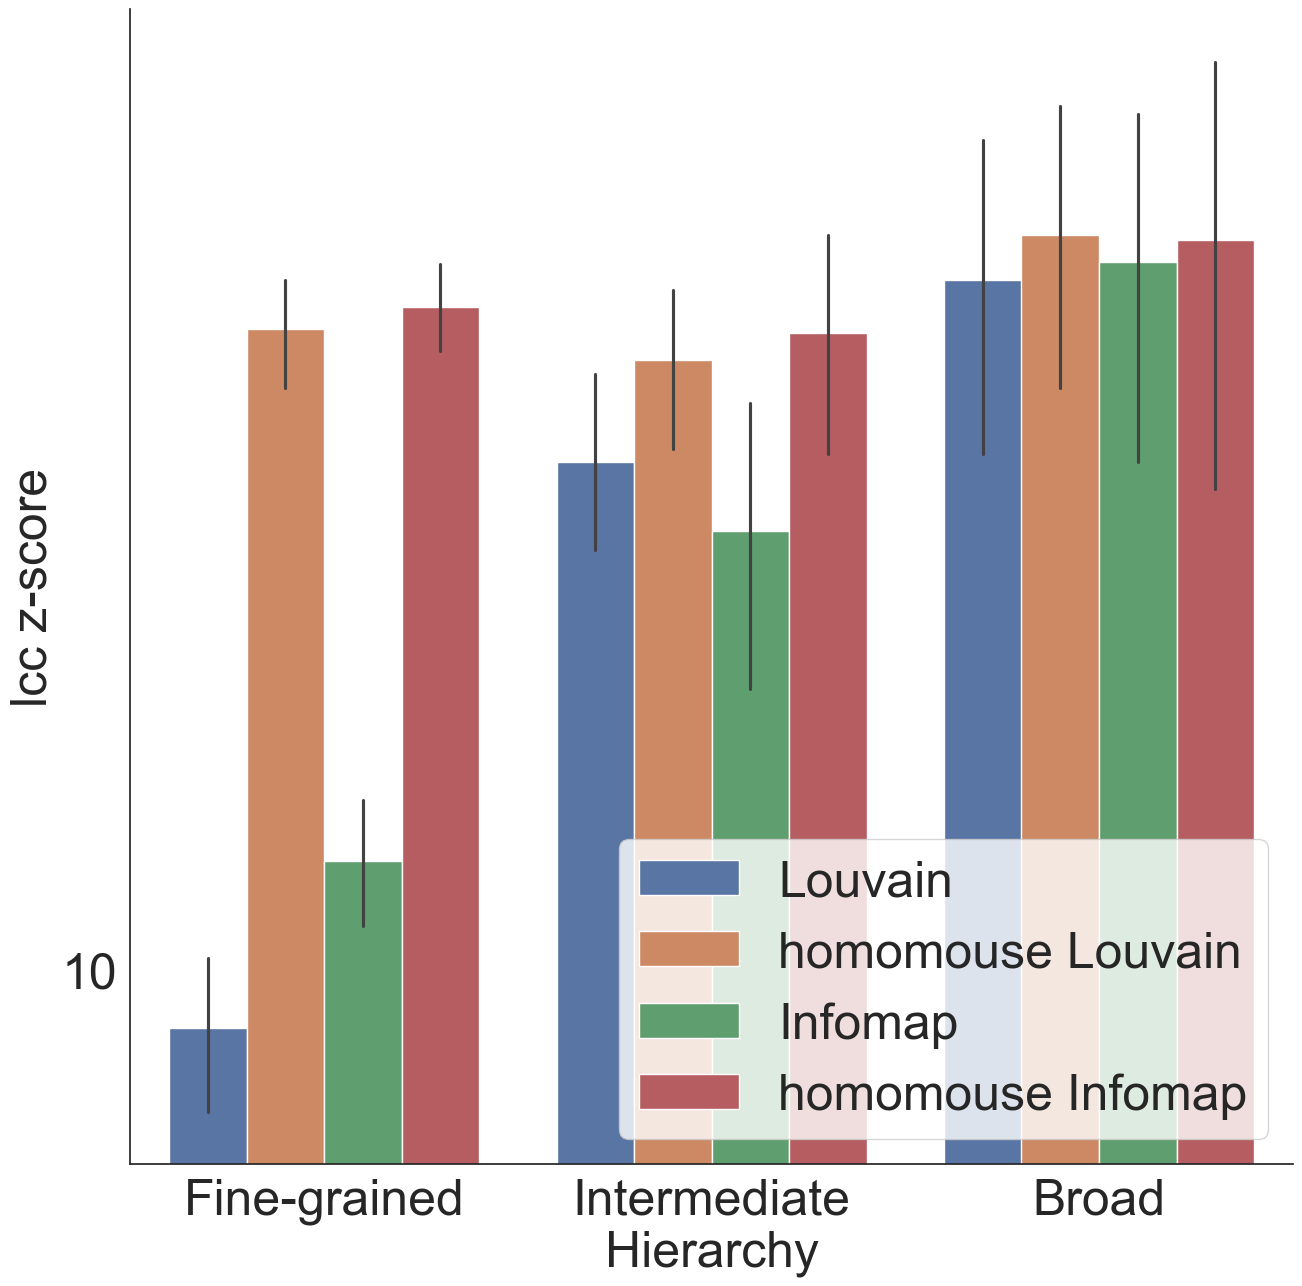

In [ ]:
com_size_df=pd.DataFrame()

status_list=[]
num_terms_list=[]
level_list=[]
community = []

for com,z in sig_enr_GOBP_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_homomouse_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_homomouse_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_homomouse_first_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOMF_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_homomouse_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)


for com,z in sig_enr_GOMF_homomouse_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_homomouse_first_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Fine-grained")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)





for com,z in sig_enr_GOBP_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_homomouse_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_homomouse_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_homomouse_second_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOMF_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_homomouse_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)


for com,z in sig_enr_GOMF_homomouse_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_homomouse_second_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Intermediate")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_homomouse_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)


for com,z in sig_enr_GOMF_homomouse_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_homomouse_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("homomouse Infomap")
    community.append(com)

for com,z in sig_enr_GOBP_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_homomouse_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOMF_homomouse_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOCC_homomouse_third_louvain_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("homomouse Louvain")
    community.append(com)

for com,z in sig_enr_GOBP_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOMF_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)

for com,z in sig_enr_GOCC_third_infomap_ora_lcc_zscore_dict.items():
    status_list.append("Broad")
    num_terms_list.append(z)
    level_list.append("Infomap")
    community.append(com)



com_size_df['Hierarchy']=status_list
com_size_df['lcc z-score']=num_terms_list
com_size_df['Type']=level_list
com_size_df['Community Name']=community


com_size_df = com_size_df.replace('nan', -2)
com_size_df = com_size_df.dropna(subset=['lcc z-score'])  # Drop rows with NaN in 'lcc z-score'


# Create a boxplot using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")

g=sns.barplot(x='Hierarchy', y='lcc z-score', hue='Type',estimator=np.mean, data=com_size_df)
g.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticklabels([int(i) for i in list(ax.get_yticks())], size=36)
plt.xticks(fontsize=36)

plt.xlabel('Hierarchy', fontsize=36)
plt.ylabel('lcc z-score', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('output/Figures/homomouseBipartite_CommunityEnrichment_lcc_comparison.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()

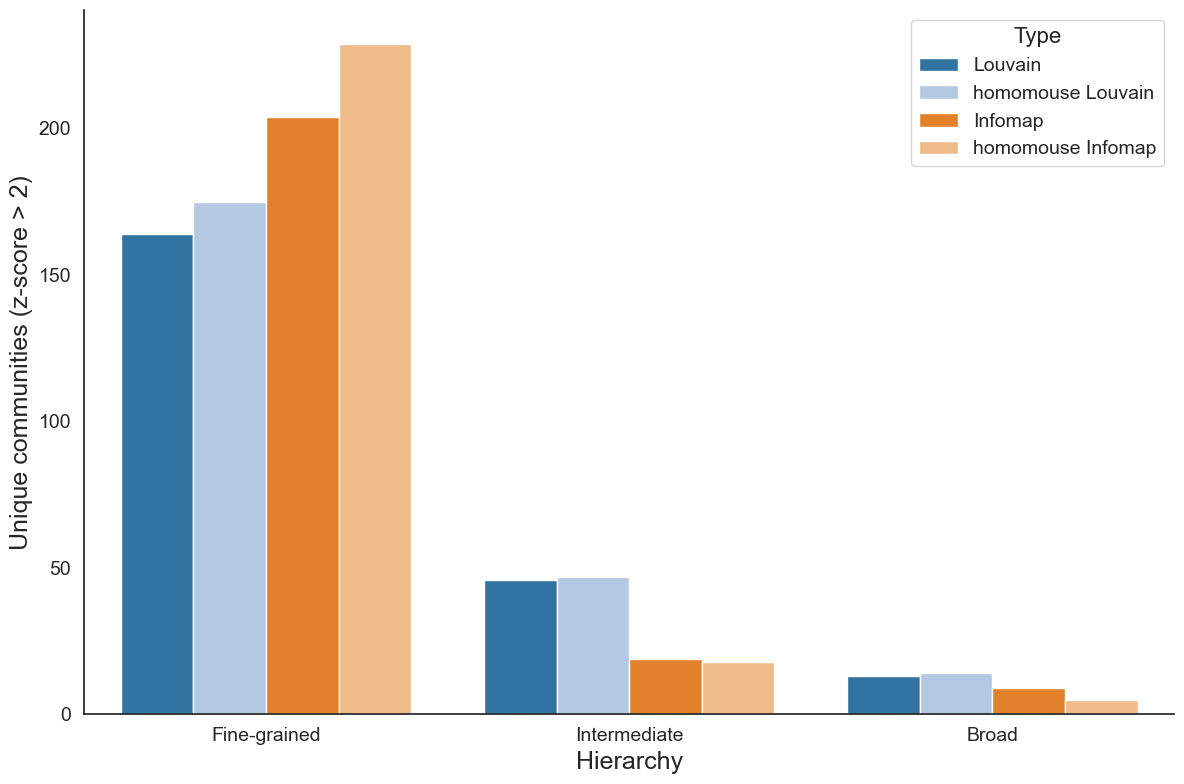

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter only communities with lcc z-score > 2
filtered_df = com_size_df[com_size_df['lcc z-score'] > 2]

# Count unique communities grouped by Hierarchy and Type
plot_df = (
    filtered_df.groupby(['Hierarchy', 'Type'])['Community Name']
    .nunique()
    .reset_index(name='Num_communities')
)

# Set hierarchy order
hierarchy_order = ['Fine-grained', 'Intermediate', 'Broad']
plot_df['Hierarchy'] = pd.Categorical(
    plot_df['Hierarchy'], categories=hierarchy_order, ordered=True
)

# Set type order
type_order = ["Louvain", "homomouse Louvain", "Infomap", "homomouse Infomap"]
plot_df['Type'] = pd.Categorical(
    plot_df['Type'], categories=type_order, ordered=True
)

# Define palette for the four categories
palette = {
    "Louvain": "#1f77b4",        # blue
    "homomouse Louvain": "#aec7e8", # light blue
    "Infomap": "#ff7f0e",        # orange
    "homomouse Infomap": "#ffbb78"  # light orange
}

# Plot
plt.figure(figsize=(12,8))
ax = sns.barplot(
    x='Hierarchy',
    y='Num_communities',
    hue='Type',
    data=plot_df,
    order=hierarchy_order,
    hue_order=type_order,
    palette=palette
)

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.xlabel("Hierarchy", fontsize=18)
plt.ylabel("Unique communities (z-score > 2)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Type", fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.savefig('output/Figures/homomouseBipartite_CommunityEnrichment_lcc_comparison_v2.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.show()